1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [101]:
# Paso el csv a dataframe
dataframe = pd.read_csv("../data/iris.csv")
dataframe.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [102]:
# Busco cuantas filas tiene el DataFrame
dataframe.shape

(150, 5)

In [103]:
# Dividimos las columnas en X/y y las hacemos array
X = np.array(dataframe.drop(['variety'], axis=1))
y = np.array(dataframe['variety'])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

## Pregunta 1: Mediante regresión logística, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7

In [105]:
# Creo el DataFrame con los datos nuevos
X_new = pd.DataFrame({'sepal.length': [15.7, 1.7], 'sepal.width': [2.8, 3.8], 'petal.length': [9.5, 4.5], 'petal.width': [0.1, 11.3]})
X_new

,sepal.length,sepal.width,petal.length,petal.width
0,15.7,2.8,9.5,0.1
1,1.7,3.8,4.5,11.3


In [106]:
# Creo el objeto modelo y lo entreno con X_train e y_train y k=3
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [107]:
predictions = model3.predict(X_new)
print(predictions)

['Virginica' 'Virginica']


In [108]:
# Creo el objeto modelo y lo entreno con X_train e y_train y k=7
model7 = KNeighborsClassifier(n_neighbors=7)
model7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [109]:
predictions = model7.predict(X_new)
print(predictions)

['Virginica' 'Virginica']


## Pregunta 2: ¿Qué acierto tiene tu modelo para k=3, k=7? (score)

In [110]:
model3.score(X,y)

0.9666666666666667

In [111]:
model7.score(X,y)

0.98

In [112]:
model3.score(X_train,y_train)

0.9583333333333334

In [113]:
model7.score(X_train,y_train)

0.975

In [114]:
model3.score(X_test,y_test)

1.0

In [115]:
model7.score(X_test,y_test)

1.0

## Pregunta 3: Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.

([<matplotlib.axis.XTick at 0x1d87977e220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

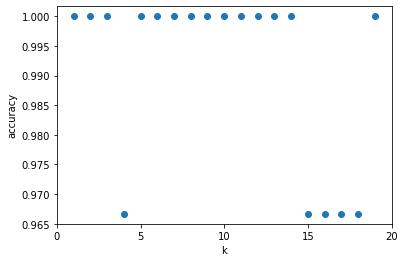

In [116]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## Pregunta 4: Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=100)

([<matplotlib.axis.XTick at 0x1d8797e39a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

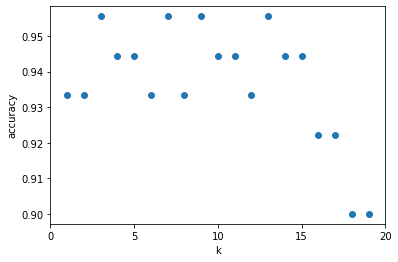

In [118]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## Pregunta 5: Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [119]:
dataframe = dataframe[~dataframe.variety.str.contains("Setosa")]
dataframe.shape

(100, 5)

In [120]:
X = np.array(dataframe.drop(['variety'], axis=1))
y = np.array(dataframe['variety'])

In [122]:
# Divido 60% train y 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=100)

([<matplotlib.axis.XTick at 0x1d879848ee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

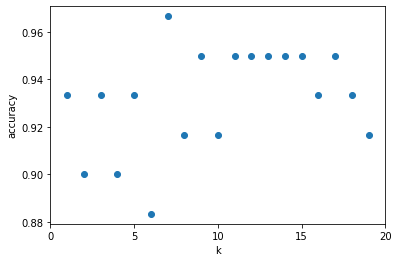

In [123]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## Pregunta 6: ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

Es un buen algoritmo dependiendo del K y de la proporción de test y train